## Abstract 

Zomato is one of the best online food delivery apps which gives the users the ratings and the reviews on restaurants all over india.These ratings and the Reviews are considered as one of the most important deciding factors which determine how good a restaurant is.

We will therefore use the real time Data set with variuos features a user would look into regarding a restaurant. We will be considering Banglore City in this analysis.

Content The basic idea of analyzing the Zomato dataset is to get a fair idea about the factors affecting the establishment of different types of restaurant at different places in Bengaluru, aggregate rating of each restaurant, Bengaluru being one such city has more than 12,000 restaurants with restaurants serving dishes from all over the world.

With each day new restaurants opening the industry has’nt been saturated yet and the demand is increasing day by day. Inspite of increasing demand it however has become difficult for new restaurants to compete with established restaurants. Most of them serving the same food. Bengaluru being an IT capital of India. Most of the people here are dependent mainly on the restaurant food as they don’t have time to cook for themselves.

With such an overwhelming demand of restaurants it has therefore become important to study the demography of a location. What kind of a food is more popular in a locality. Do the entire locality loves vegetarian food. If yes then is that locality populated by a particular sect of people for eg. Jain, Marwaris, Gujaratis who are mostly vegetarian. These kind of analysis can be done using the data, by studying the factors such as

• Location of the restaurant
• Approx Price of food
• Theme based restaurant or not
• Which locality of that city serves that cuisines with maximum number of restaurants
• The needs of people who are striving to get the best cuisine of the neighborhood
• Is a particular neighborhood famous for its own kind of food.

“Just so that you have a good meal the next time you step out”

The data is accurate to that available on the zomato website until 15 March 2019. The data was scraped from Zomato in two phase. After going through the structure of the website I found that for each neighborhood there are 6-7 category of restaurants viz. Buffet, Cafes, Delivery, Desserts, Dine-out, Drinks & nightlife, Pubs and bars.

#### Main Objective:

The main agenda of this project is:

Perform extensive "Exploratory Data Analysis(EDA)" on the Zomato Dataset.


In [1]:
## import all the dependencies 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.graph_objs as go
import plotly.offline as py

%matplotlib inline

import warnings 
warnings.filterwarnings('ignore')

**Mount Drive**

In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

**Load Dataset**

In [3]:
data = pd.read_csv("/kaggle/input/zomato-bangalore-dataset/zomato.csv")

In [4]:
## first 5 rows of the dataset 

data.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


**Columns Description**

1. **url </B> contains the url of the restaurant in the zomato website**

2. **Address** contains the address of the restaurant in Bengaluru

3. **Name** contains the name of the restaurant

4. **Online_order** whether online ordering is available in the restaurant or not

5. **Book_table** table book option available or not

6. **Rate** contains the overall rating of the restaurant out of 5

7. **Votes** contains total number of rating for the restaurant as of the above mentioned date

8. **Phone** contains the phone number of the restaurant

9. **Location** contains the neighborhood in which the restaurant is located

10. **rest_type** restaurant type

11. **dish_liked** dishes people liked in the restaurant

12. **cuisines** food styles, separated by comma

13. **approx_cost(for two people)** contains the approximate cost of meal for two people

14. **reviews_list** list of tuples containing reviews for the restaurant, each tuple

15. **menu_item** contains list of menus available in the restaurant

16. **listed_in**(type) type of meal

17. **listed_in**(city) contains the neighborhood in which the restaurant is listed



In [5]:
## Measure the rows and columns 

data.shape

(51717, 17)

In [6]:
## checking the data types of the datasets 

data.dtypes

url                            object
address                        object
name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
phone                          object
location                       object
rest_type                      object
dish_liked                     object
cuisines                       object
approx_cost(for two people)    object
reviews_list                   object
menu_item                      object
listed_in(type)                object
listed_in(city)                object
dtype: object

In [7]:
## check the missing values 

data.isna().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [8]:
## Statistical Measures 

data.describe()

,votes
count,51717.000000
mean,283.697527
std,803.838853
min,0.000000
25%,7.000000
50%,41.000000
75%,198.000000
max,16832.000000


In [9]:
## Delete the unnecessay columns 

df = data.drop(['url','phone'],axis=1)

In [10]:
df.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


**Checking for duplicate values**

In [11]:
df.duplicated().sum()

43

In [12]:
## drop the duplicates 

df.drop_duplicates(inplace=True)

In [13]:
df.duplicated().sum()

0

**Drop Null values**

In [14]:
## Remove the Nan values from the dataset 

df.dropna(how='any', inplace=True)


In [15]:
df.isnull().sum()

address                        0
name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
location                       0
rest_type                      0
dish_liked                     0
cuisines                       0
approx_cost(for two people)    0
reviews_list                   0
menu_item                      0
listed_in(type)                0
listed_in(city)                0
dtype: int64

**Renaming the columns Appropriately**

In [16]:
df.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [17]:
df = df.rename(columns={'approx_cost(for two people)':'cost', 'listed_in(type)':'type', 'listed_in(city)':'city'})

In [18]:
df.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'dish_liked', 'cuisines', 'cost',
       'reviews_list', 'menu_item', 'type', 'city'],
      dtype='object')

In [19]:
df.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,type,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


**Cleaning the dataset**

In [20]:
df['cost'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '750', '200', '850', '1,200', '150', '350', '250', '1,500',
       '1,300', '1,000', '100', '900', '1,100', '1,600', '950', '230',
       '1,700', '1,400', '1,350', '2,200', '2,000', '1,800', '1,900',
       '180', '330', '2,500', '2,100', '3,000', '2,800', '3,400', '40',
       '1,250', '3,500', '4,000', '2,400', '1,450', '3,200', '6,000',
       '1,050', '4,100', '2,300', '120', '2,600', '5,000', '3,700',
       '1,650', '2,700', '4,500'], dtype=object)

**Replacing the "," with nothing and converting the results to float**

In [21]:
df['cost'] = df['cost'].apply(lambda x: x.replace(",",""))
df['cost'] = df['cost'].astype(float)


In [22]:
print(df['cost'].unique())
print('---'*10)
df.dtypes

[ 800.  300.  600.  700.  550.  500.  450.  650.  400.  750.  200.  850.
 1200.  150.  350.  250. 1500. 1300. 1000.  100.  900. 1100. 1600.  950.
  230. 1700. 1400. 1350. 2200. 2000. 1800. 1900.  180.  330. 2500. 2100.
 3000. 2800. 3400.   40. 1250. 3500. 4000. 2400. 1450. 3200. 6000. 1050.
 4100. 2300.  120. 2600. 5000. 3700. 1650. 2700. 4500.]
------------------------------


address          object
name             object
online_order     object
book_table       object
rate             object
votes             int64
location         object
rest_type        object
dish_liked       object
cuisines         object
cost            float64
reviews_list     object
menu_item        object
type             object
city             object
dtype: object

In [23]:
## Reading the unique values from the Rate column

df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '4.6/5', '4.0/5', '4.2/5', '3.9/5',
       '3.0/5', '3.6/5', '2.8/5', '4.4/5', '3.1/5', '4.3/5', '2.6/5',
       '3.3/5', '3.5/5', '3.8 /5', '3.2/5', '4.5/5', '2.5/5', '2.9/5',
       '3.4/5', '2.7/5', '4.7/5', 'NEW', '2.4/5', '2.2/5', '2.3/5',
       '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5', '4.1 /5', '2.9 /5',
       '2.7 /5', '2.5 /5', '2.6 /5', '4.5 /5', '4.3 /5', '3.7 /5',
       '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '3.4 /5', '3.6 /5',
       '3.3 /5', '4.6 /5', '4.9 /5', '3.2 /5', '3.0 /5', '2.8 /5',
       '3.5 /5', '3.1 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [24]:
df = df.loc[df.rate != 'NEW']  ##getting rid of "NEW"

In [25]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '4.6/5', '4.0/5', '4.2/5', '3.9/5',
       '3.0/5', '3.6/5', '2.8/5', '4.4/5', '3.1/5', '4.3/5', '2.6/5',
       '3.3/5', '3.5/5', '3.8 /5', '3.2/5', '4.5/5', '2.5/5', '2.9/5',
       '3.4/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5', '4.8/5',
       '3.9 /5', '4.2 /5', '4.0 /5', '4.1 /5', '2.9 /5', '2.7 /5',
       '2.5 /5', '2.6 /5', '4.5 /5', '4.3 /5', '3.7 /5', '4.4 /5',
       '4.9/5', '2.1/5', '2.0/5', '1.8/5', '3.4 /5', '3.6 /5', '3.3 /5',
       '4.6 /5', '4.9 /5', '3.2 /5', '3.0 /5', '2.8 /5', '3.5 /5',
       '3.1 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5', '2.1 /5',
       '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [26]:
## Removing the '/5' from ratings 

df['rate']  = df['rate'].apply(lambda x: x.replace('/5',''))
df['rate'].unique()

array(['4.1', '3.8', '3.7', '4.6', '4.0', '4.2', '3.9', '3.0', '3.6',
       '2.8', '4.4', '3.1', '4.3', '2.6', '3.3', '3.5', '3.8 ', '3.2',
       '4.5', '2.5', '2.9', '3.4', '2.7', '4.7', '2.4', '2.2', '2.3',
       '4.8', '3.9 ', '4.2 ', '4.0 ', '4.1 ', '2.9 ', '2.7 ', '2.5 ',
       '2.6 ', '4.5 ', '4.3 ', '3.7 ', '4.4 ', '4.9', '2.1', '2.0', '1.8',
       '3.4 ', '3.6 ', '3.3 ', '4.6 ', '4.9 ', '3.2 ', '3.0 ', '2.8 ',
       '3.5 ', '3.1 ', '4.8 ', '2.3 ', '4.7 ', '2.4 ', '2.1 ', '2.2 ',
       '2.0 ', '1.8 '], dtype=object)

### Visualizations 

Most Famous resturants chains in Bangaluru

In [27]:
chains=df['name'].value_counts()[:20]
chains

Onesta                    85
Empire Restaurant         67
KFC                       59
McDonald's                57
Pizza Hut                 56
Domino's Pizza            55
Smally's Resto Cafe       54
Faasos                    54
Corner House Ice Cream    52
Burger King               51
Polar Bear                48
Smoor                     47
Mani's Dum Biryani        47
Pizza Stop                46
Mainland China            45
Chung Wah                 45
Subway                    45
Lakeview Milkbar          44
eat.fit                   44
Hammered                  44
Name: name, dtype: int64

Text(0.5, 0, 'Number of Outlets')

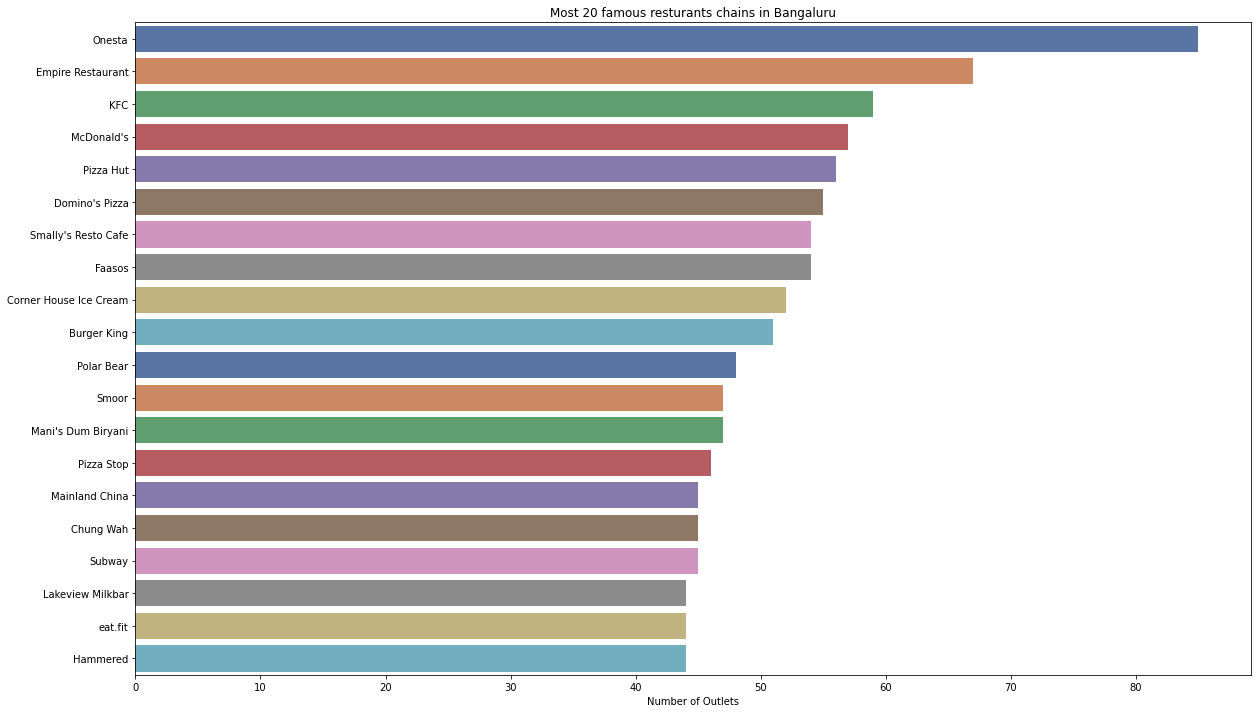

In [28]:
## top 20 famous resturants 

plt.figure(figsize=(20,12))
sns.barplot(x=chains, y=chains.index, palette='deep')
plt.title("Most 20 famous resturants chains in Bangaluru")
plt.xlabel("Number of Outlets")

In [29]:
chains_10 = df['name'].value_counts()[:10]
chains_10

Onesta                    85
Empire Restaurant         67
KFC                       59
McDonald's                57
Pizza Hut                 56
Domino's Pizza            55
Smally's Resto Cafe       54
Faasos                    54
Corner House Ice Cream    52
Burger King               51
Name: name, dtype: int64

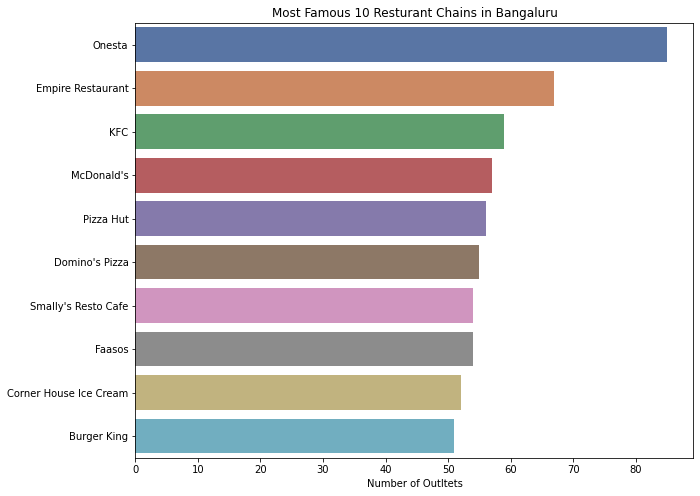

In [30]:
## visualizae the Famous 10 chains of resturants 

plt.figure(figsize=(10,8))
sns.barplot(x=chains_10, y=chains_10.index, palette='deep')
plt.title("Most Famous 10 Resturant Chains in Bangaluru")
plt.xlabel("Number of Outltets")
plt.show();

Whether resturant offer Table booking or not 

In [31]:
x = df['book_table'].value_counts()
colors = ['#800080', '#0000A0']

trace=go.Pie(labels=x.index,values=x,textinfo="value",
            marker=dict(colors=colors, 
                           line=dict(color='#001000', width=2)))

layout=go.Layout(title="Table Booking", width=600, height=600)
fig=go.Figure(data=[trace], layout=layout)
py.iplot(fig, filename='pie_chart_subplots')

**Insight**

Most of the Restaurants do not offer table booking

Whether Resturants deliver online or Not

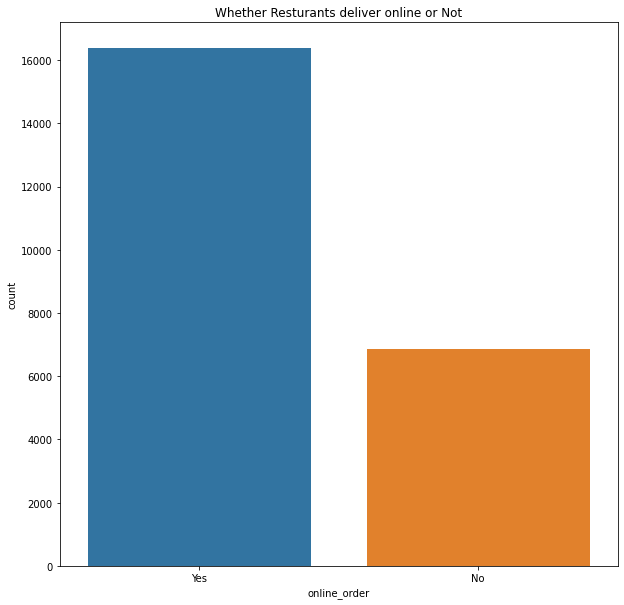

In [32]:
sns.countplot(df['online_order'])
fig=plt.gcf()
fig.set_size_inches(10,10)
plt.title("Whether Resturants deliver online or Not")
plt.show();

**Insight**

Most Resturants offer option for online order and delivery

### **Ratings Distributions**

<AxesSubplot:xlabel='rate', ylabel='Density'>

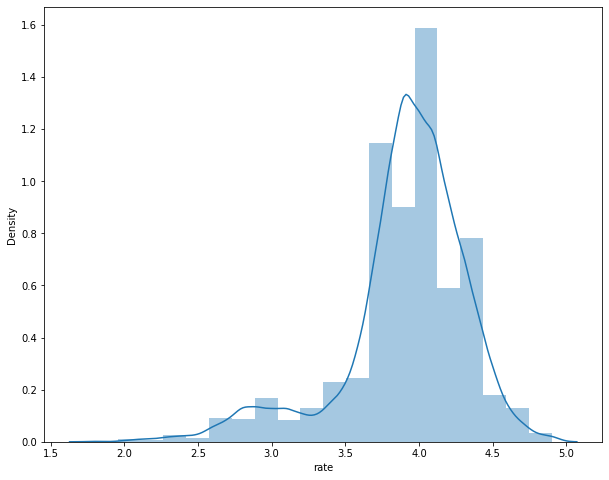

In [33]:
plt.figure(figsize=(10,8))
sns.distplot(df['rate'],bins=20)

**Insight**

We can infer from above that most of the ratings are within 3.5 and 4.5

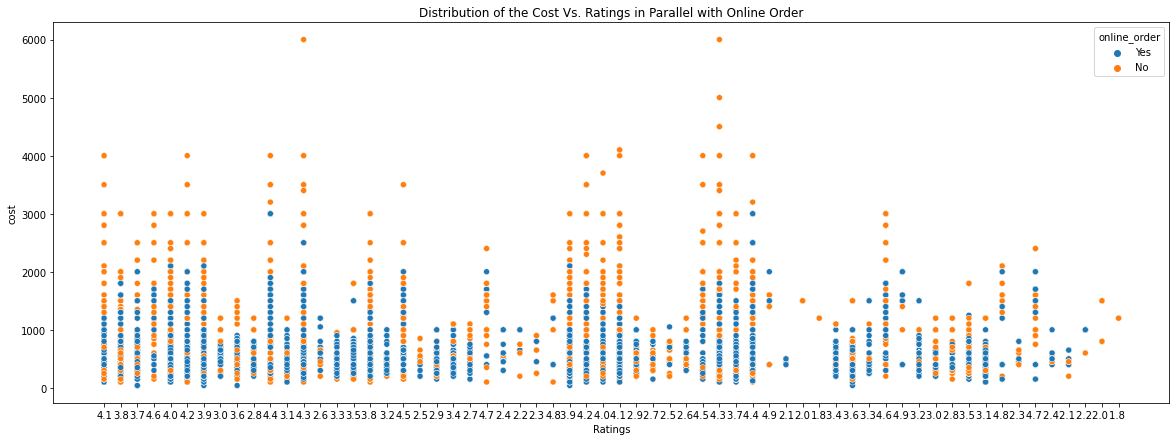

In [34]:
## Distribution of the cost VS. Ratings in parallel with online order 

plt.figure(figsize=(20,7))
sns.scatterplot(x="rate",y="cost",hue="online_order",data=df)
plt.title("Distribution of the Cost Vs. Ratings in Parallel with Online Order")
plt.xlabel("Ratings")
plt.show();

**Count of ratings as between "1 and 2", "2 and 3", "3 and 4", and "4 and 5"**

In [35]:
df['rate'].unique()

array(['4.1', '3.8', '3.7', '4.6', '4.0', '4.2', '3.9', '3.0', '3.6',
       '2.8', '4.4', '3.1', '4.3', '2.6', '3.3', '3.5', '3.8 ', '3.2',
       '4.5', '2.5', '2.9', '3.4', '2.7', '4.7', '2.4', '2.2', '2.3',
       '4.8', '3.9 ', '4.2 ', '4.0 ', '4.1 ', '2.9 ', '2.7 ', '2.5 ',
       '2.6 ', '4.5 ', '4.3 ', '3.7 ', '4.4 ', '4.9', '2.1', '2.0', '1.8',
       '3.4 ', '3.6 ', '3.3 ', '4.6 ', '4.9 ', '3.2 ', '3.0 ', '2.8 ',
       '3.5 ', '3.1 ', '4.8 ', '2.3 ', '4.7 ', '2.4 ', '2.1 ', '2.2 ',
       '2.0 ', '1.8 '], dtype=object)

In [36]:
df['rate'].min()

'1.8'

In [37]:
df['rate'].max()

'4.9 '

In [38]:
df['rate'] = df['rate'].astype(float)

In [39]:
((df['rate']>=1) & (df['rate']<2)).sum()

5

In [40]:
((df['rate']>=2)&(df['rate']<3)).sum()

1179

In [41]:
((df['rate']>=3) & (df['rate']<4)).sum()


10153

In [42]:
((df['rate']>=4) &  (df['rate']<5)).sum()

11911

**Plotting the counts with the help of pie chart**

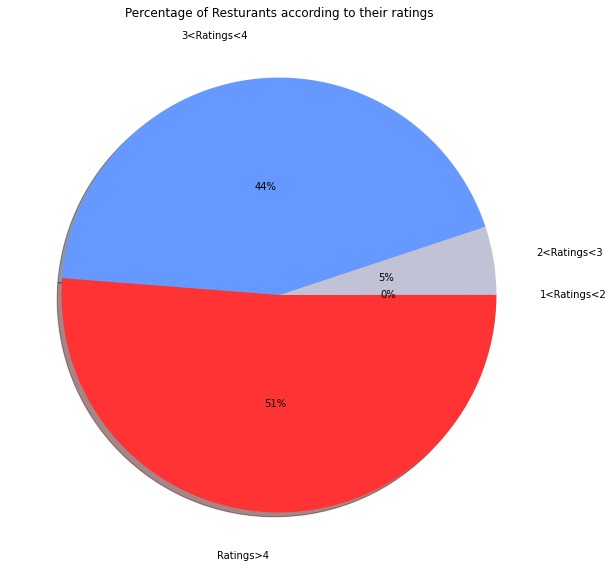

In [43]:
slices =[((df['rate']>=1) & (df['rate']<2)).sum(),
         ((df['rate']>=2) & (df['rate']<3)).sum(),
         ((df['rate']>=3) & (df['rate']<4)).sum(),
         (df['rate']>=4).sum()]

labels =['1<Ratings<2','2<Ratings<3','3<Ratings<4','Ratings>4']
colors = ['#ff3333','#c2c2d6','#6699ff']   
plt.pie(slices, colors=colors, labels=labels, autopct="%1.0f%%",pctdistance=0.5,labeldistance=1.2, shadow=True); 
fig=plt.gcf()
plt.title("Percentage of Resturants according to their ratings")

fig.set_size_inches(10,10)
plt.show();

## **Service Types**

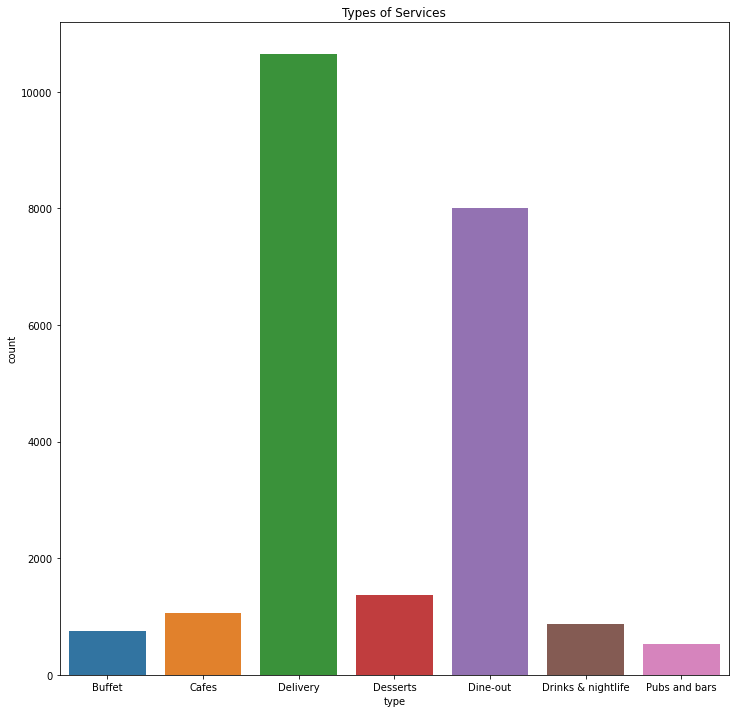

In [44]:
## types of Services

sns.countplot(df['type'])
fig = plt.gcf()
fig.set_size_inches(12,12)
plt.title("Types of Services");

**Insight**

Here the two main service types are **Delivery** and **Dine-out**.


## **Distribution of Cost of Food for two People**

In [45]:
from plotly.offline import iplot

In [46]:
trace0 = go.Box(y=df['cost'], name="Accepting Online Orders",
                marker=dict(
                    color='rgb(113,10,100)',))

data=[trace0]
layout=go.Layout(title="Box Plot of Approximate Cost", width=800, height=800, yaxis=dict(title="price"))
fig=go.Figure(data=data, layout=layout) 
py.iplot(fig)

**Distribution of Charges**

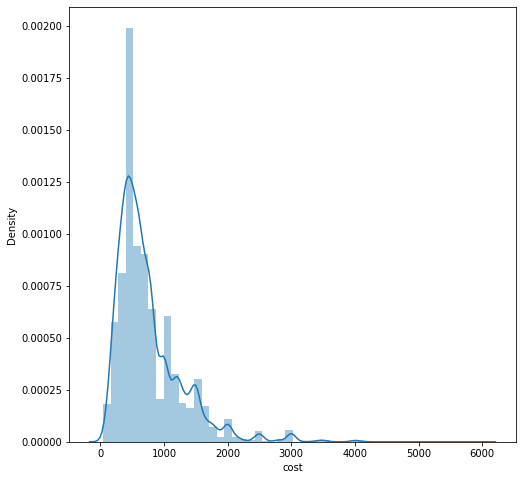

In [47]:
plt.figure(figsize=(8,8))
sns.distplot(df['cost'])
plt.show()

## **Most Likes Dishes**

In [48]:
df['dish_liked'].value_counts()

Biryani                                                                                                                 179
Friendly Staff                                                                                                           68
Waffles                                                                                                                  67
Chicken Biryani                                                                                                          66
Masala Dosa                                                                                                              56
                                                                                                                       ... 
Tea, Coffee, Kadala Curry, Chicken Dum Biryani, Shawarma, Ghee Rice, Chicken Kebab                                        1
Gulab Jamun, Mint Raita, Mutton Biryani, Basmati Rice, Paneer Subz Biryani, Gosht Dum Biryani                             1
Garlic B

In [49]:
## re - regular Expression ( use for the Spillting words)

import re 

df.index = range(df.shape[0])
likes=[]
for i in range(df.shape[0]):
  array_split=re.split(',',df['dish_liked'][i])
  for item in array_split:
    likes.append(item)

In [50]:
df.index = range(df.shape[0])

In [51]:
df.index

RangeIndex(start=0, stop=23248, step=1)

In [52]:
print("Count of most likes dishes in Bangalore")
fev_food = pd.Series(likes).value_counts()[:30]
fev_food

Count of most likes dishes in Bangalore


 Pasta              2692
 Pizza              1915
 Cocktails          1880
 Burgers            1736
 Mocktails          1623
 Biryani            1307
 Sandwiches         1287
Burgers             1256
 Coffee             1184
 Nachos             1170
 Fish               1116
 Paratha            1107
 Salads             1055
 Chicken Biryani    1004
Cocktails            891
 Fries               876
 Noodles             854
 Beer                835
 Mutton Biryani      832
 Tea                 819
Coffee               801
 Sandwich            788
 Butter Chicken      782
 Thali               770
Biryani              749
Pizza                747
 Roti                729
 Brownie             726
 Salad               677
 Hot Chocolate       672
dtype: int64

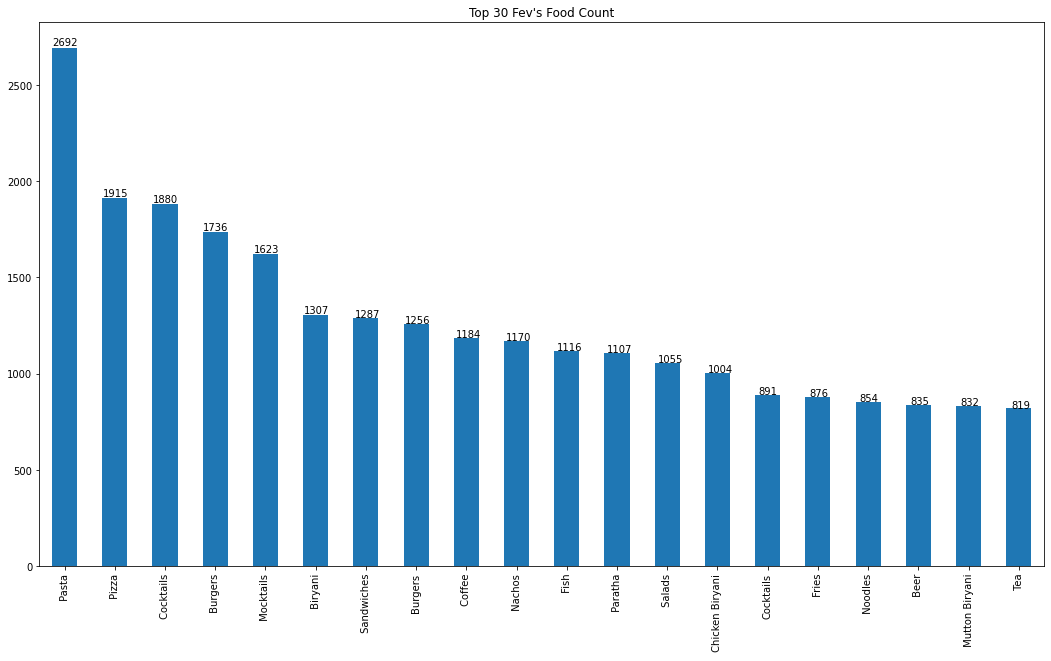

In [53]:
ax = fev_food.nlargest(n=20, keep='first').plot(kind='bar',figsize=(18,10) ,title="Top 30 Fev's Food Count")
for i in ax.patches:
  ax.annotate(str(i.get_height()),(i.get_x() * 1.005, i.get_height() * 1.005))


We can inver from the analysis that the 5 most liked dishes are **pasta, Pizza, Cocktails, Burgers,** and **Mocktails**

**Restaurant and their counts**

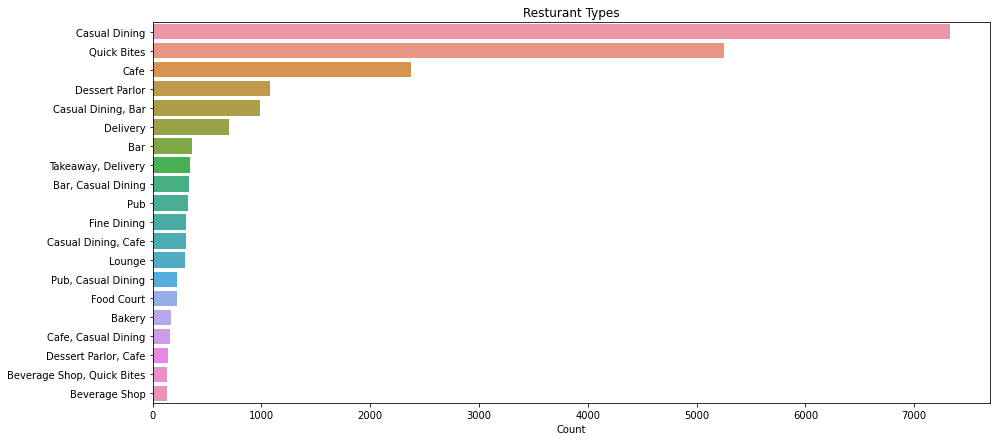

In [54]:
plt.figure(figsize=(15,7))
rest=df['rest_type'].value_counts()[:20]
sns.barplot(rest,rest.index)
plt.title("Resturant Types")
plt.xlabel("Count");

**Casual Dinning, Quick Bites** and **Cafe** are the 3 most common types of Resturants in Banglore.